In [15]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from os.path import join as p_join

import seaborn as sns

##################################
## GLOBAL SETTINGS ###############
##################################
plt.rcParams["figure.figsize"] = (12,8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
CLASSES = [0, 1, 2, 3]


###################################
####     SKIT-LEARN DEPS       ####
###################################
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm

In [4]:
def seed_all(seed=42):

    random.seed(seed)
    np.random.seed(seed)
    print("[ Using Seed : ", seed, " ]")

####################################
#####   SEED ALL EXPERIMENTS   #####
####################################
seed_all()

[ Using Seed :  42  ]


In [6]:
import sys
sys.path.append("../../") # Adds higher directory to python modules path.
from utils import utils

In [12]:
def plot_conf_matrix(model, X, Y):
    predictions = model.predict(X)
    cm = confusion_matrix(Y, predictions, labels=CLASSES)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=CLASSES)
    disp.plot()
    plt.show()

### Prepare data and split it!

In [8]:
data_path = p_join('..', '..', 'data_2')
FOLDERS = [p_join(os.path.abspath(data_path), item) for item in os.listdir(data_path) if 'L=10.6' in item]
X, Y = utils.create_dataset(FOLDERS)
X = utils.normalize_data(X)

100%|███████████████████████████████████████████| 16/16 [00:01<00:00,  8.47it/s]


In [13]:
### Train SVC
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, random_state=0)
model = svm.SVC(C=1000, n_jobs=-1)
model.fit(X_train, y_train)
pass

### Plot conf Matrix

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


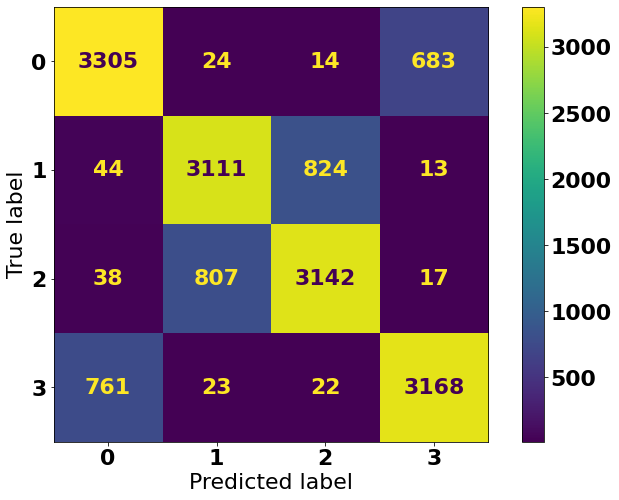

In [16]:
plot_conf_matrix(model, X_test, y_test)
pass

In [17]:
# Calc Accuracy:
predictions = model.predict(X_test)
acc = (predictions == y_test).sum()/len(predictions)
acc

0.7955738934733684

In [ ]:
model = svm.SVC(C=2000)
model.fit(X_train, y_train)
pass